## Imports:

In [85]:
import numpy as np

# import plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

# font preferences
mpl.rcParams.update({
    'font.size': 9,
    'text.usetex': True,
    'font.family': 'Computer Modern Serif'
})

# high quality figures
plt.rcParams['savefig.dpi'] = 1200
plt.rcParams['figure.dpi'] = 1200

from scipy.signal import savgol_filter

## Read in data:

In [86]:
# Milky Way:
MW_disk_n = np.genfromtxt('MW_Disk_sersic_indices.txt', delimiter=',')
MW_bulge_n = np.genfromtxt('MW_Bulge_sersic_indices.txt', delimiter=',')

# Andromeda:
M31_disk_n = np.genfromtxt('M31_Disk_sersic_indices.txt', delimiter=',')
# M31_bulge_n = np.genfromtxt('M31_Bulge_sersic_indices.txt', delimiter=',')

# Remove NaN at the end from extra comma:
MW_disk_n = MW_disk_n[:-1]
MW_bulge_n = MW_bulge_n[:-1]

M31_disk_n = M31_disk_n[:-1]
# M31_bulge_n = M31_bulge_n[:-1]

## Smooth:

In [153]:
sz = 25 # number of points per fit
deg = 4 # 2 = quadratic fit, 3 = cubic, etc.

MW_disk_s = savgol_filter(MW_disk_n, sz, deg)
MW_bulge_s = savgol_filter(MW_bulge_n, sz, deg)

M31_disk_s = savgol_filter(M31_disk_n, sz, deg)
# M31_bulge_s = savgol_filter(M31_bulge_n, sz, deg)

## Plot:

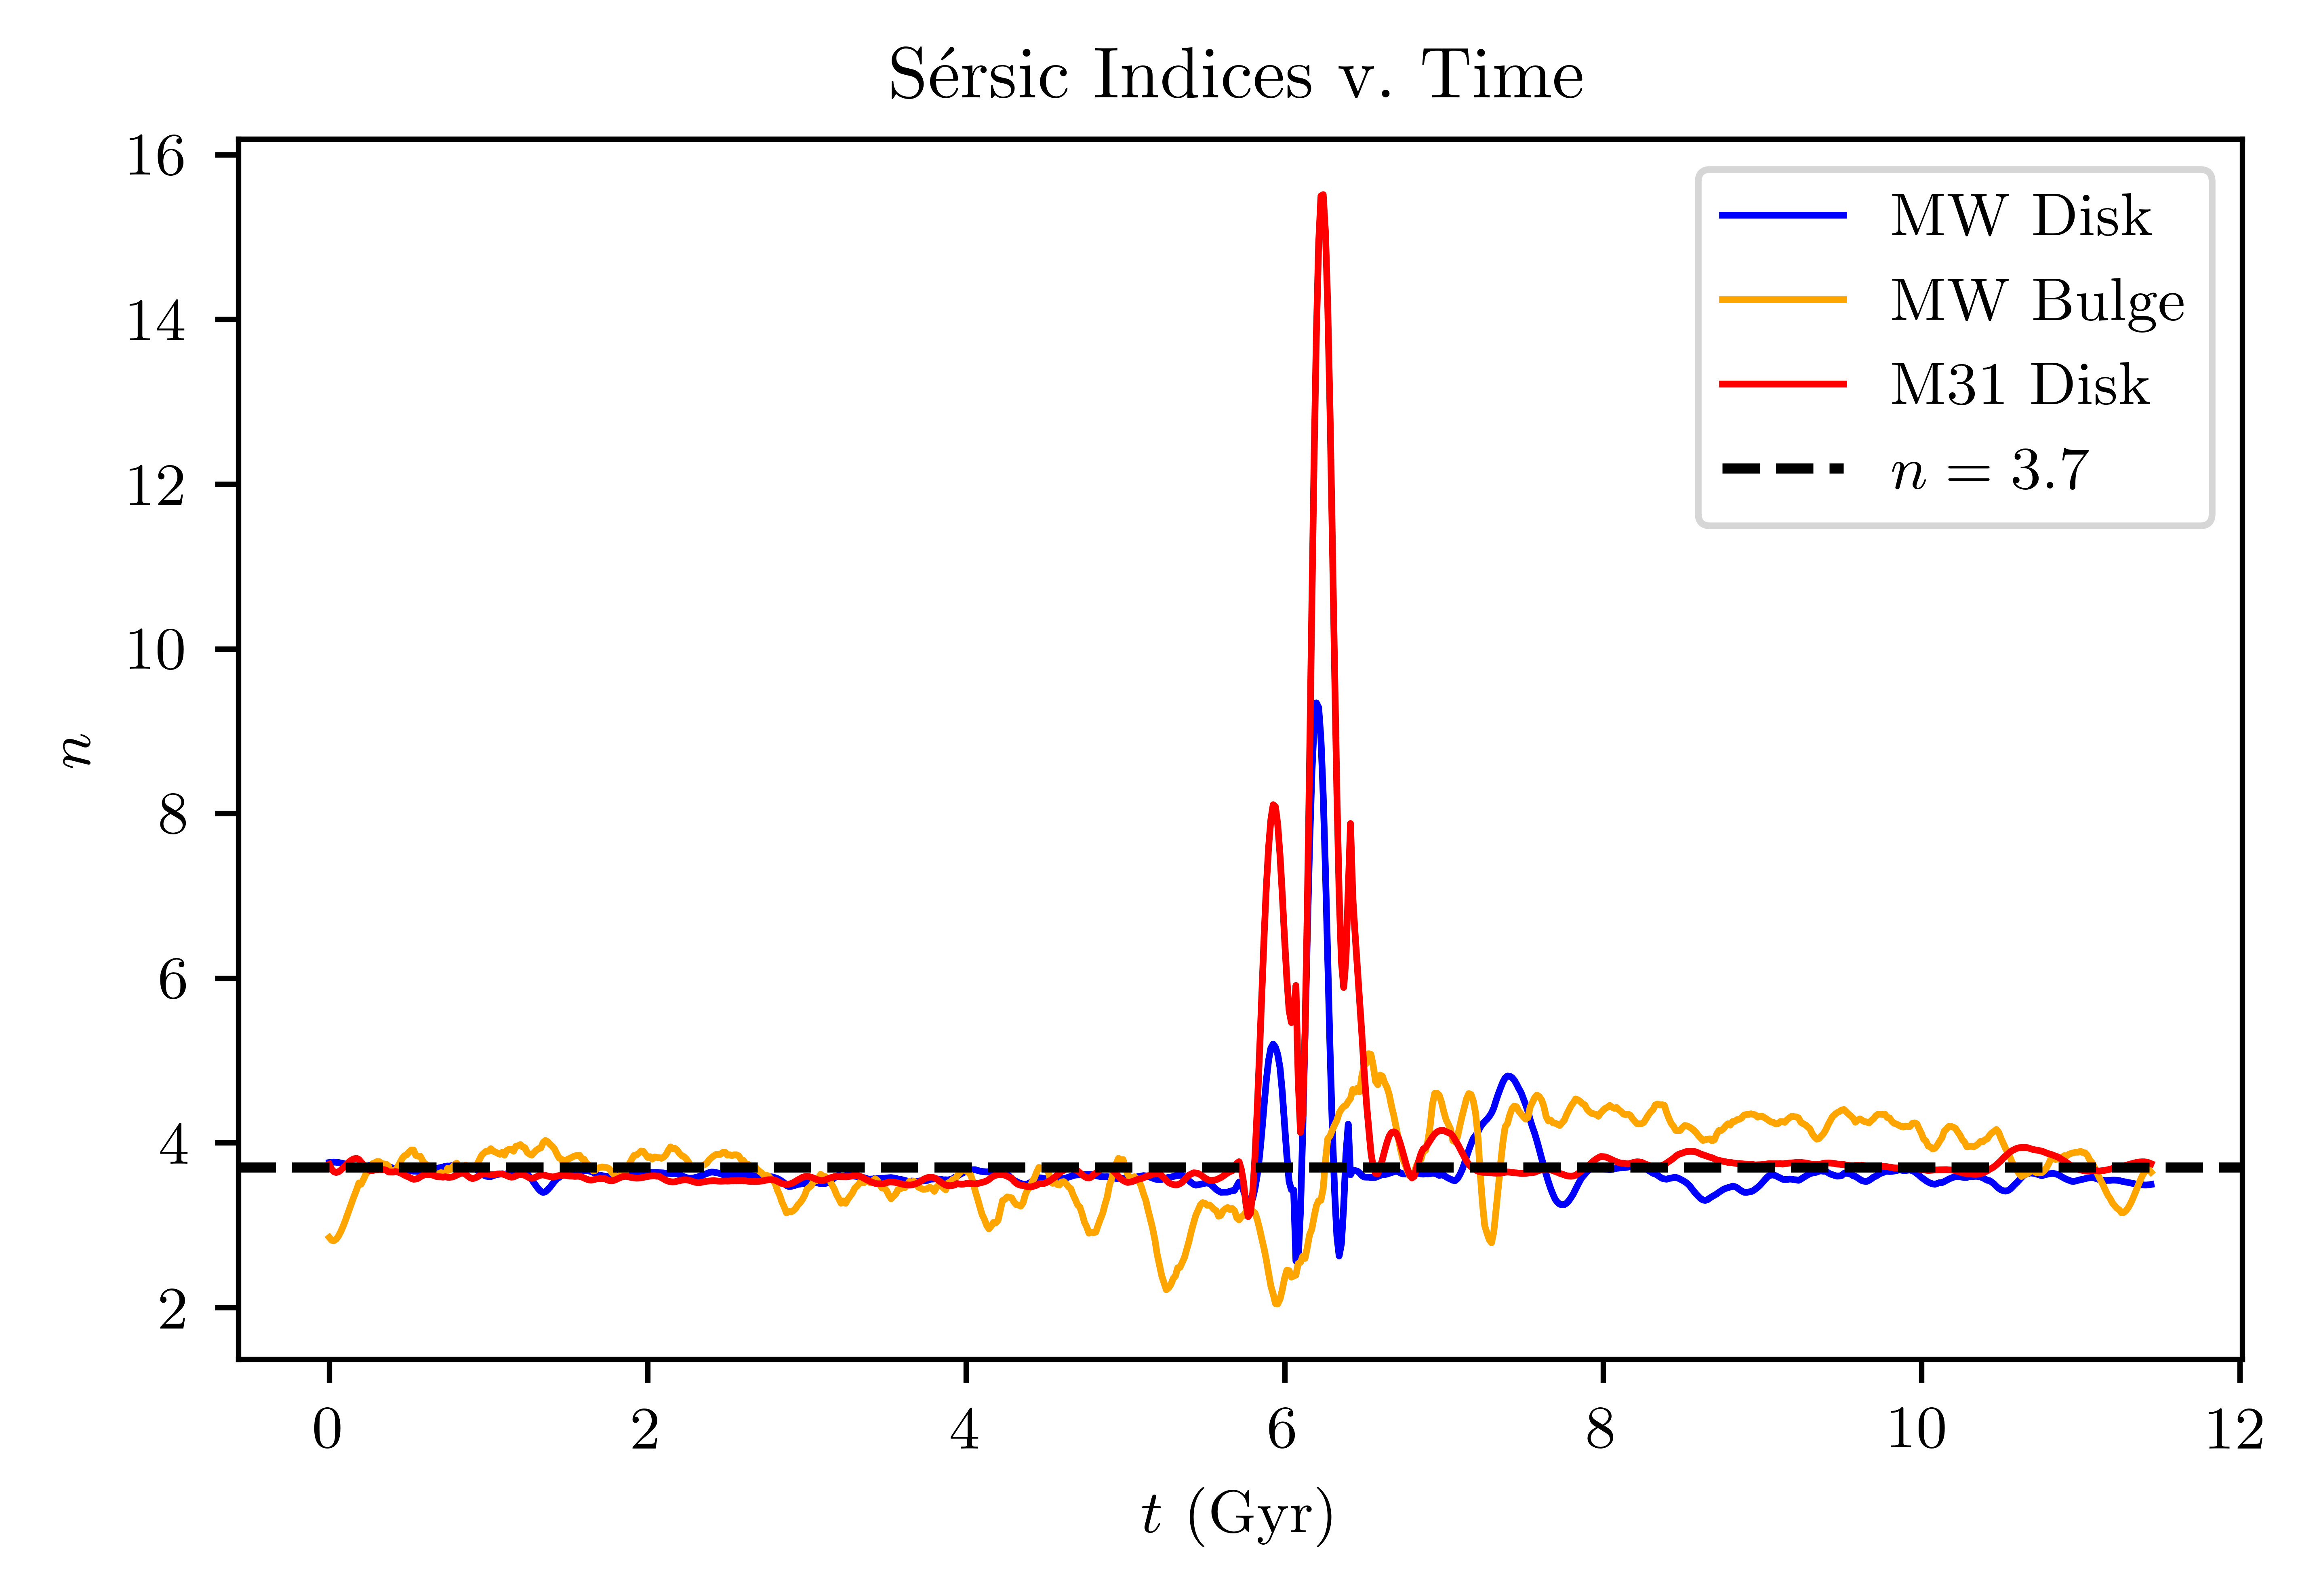

In [161]:
# times:
t = np.arange(0, 802, 1) * 0.01 / 0.7 # Gyr

# linewidth
lw = 1

fig = plt.figure(figsize=(16/3, 10/3))
ax = fig.subplots()

ax.plot(t, MW_disk_s, label='MW Disk', color='b', lw=lw)
ax.plot(t, MW_bulge_s, label='MW Bulge', color='orange', lw=lw)

ax.plot(t, M31_disk_s, label='M31 Disk', color='r', lw=lw)
# ax.plot(t, M31_bulge_s, label='M31 Bulge', color='g', lw=lw)

ax.axhline(3.7, label=r'$n = 3.7$', linestyle='--', color='k')

ax.legend()
ax.set(xlabel=r'$t$ (Gyr)', ylabel=r'$n$', title=r"S\'ersic Indices v.~Time")
plt.savefig('indices_v_time.png', facecolor='w')

plt.show()